In [28]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [29]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [30]:
#alt option
# df = pd.read_csv(
#     Path('Resources/lending_data.csv')
# )
# df.head()

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [31]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
# X = df.copy()
X = df.drop(columns=['loan_status'])

In [32]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [33]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [34]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [35]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

/opt/anaconda3/envs/PythonData_2024_12/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [36]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [37]:
# Generate a confusion matrix for the model
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[18655   110]
 [   36   583]]


In [38]:
# Print the classification report for the model
classification_report = classification_report(y_test, y_pred)
# for c in classification_report:
#     print(r)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [52]:
matrix = confusion_matrix(y_test, y_pred)
matrix_df = pd.DataFrame(
    matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']
)

In [50]:
from sklearn.metrics import accuracy_score

# Display the accuracy score for the test dataset.
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9924680148576145

In [54]:
print("Confusion Matrix")
display(matrix_df)
print(f"Accuracy Score : {acc_score}")

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18655,110
Actual 1,36,583


Accuracy Score : 0.9924680148576145


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** As shown in the classification summary, the accuracy is in the 99th percentile. This means the total correctly predicted samples wuth the total samples were 99& correct. As for the health and high-risk loans labels, the healthy loans had a higher/perfect precision rate compared to the high-risk loan. This means that there were few to none false positives in the data set like the high-risk loans precision shows.

---

# Other Models

### Linear Regression

In [39]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [40]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = Path('Resources/lending_data.csv')
loan_df = pd.read_csv(file_path)

# Review the DataFrame
loan_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [41]:
# Create a scatter plot of years_experience versus the salary information
loan_plot = loan_df.hvplot.scatter(
    x="num_of_accounts",
    y="loan_size",
    title="Expected loan size to total debt"
)
loan_plot

:Scatter   [num_of_accounts]   (loan_size)

### Random Forest

In [55]:
#import libriaries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [56]:
#after splittig the data, reating StandardScaler instance
scaler = StandardScaler()

In [57]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [58]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [60]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [61]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [62]:
# Calculating the confusion matrix
con_matrix = confusion_matrix(y_test, predictions)
con_matrix_df = pd.DataFrame(
    con_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [64]:
# Displaying results
print("Confusion Matrix")
display(con_matrix_df)
print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18666,99
Actual 1,61,558


Accuracy Score : 0.9917457697069748


In [65]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2905245094869908, 'interest_rate'),
 (0.1689678666681931, 'borrower_income'),
 (0.1656595737116133, 'total_debt'),
 (0.16225311794274436, 'debt_to_income'),
 (0.11305307337058236, 'loan_size'),
 (0.09944441829592796, 'num_of_accounts'),
 (9.744052394805161e-05, 'derogatory_marks')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

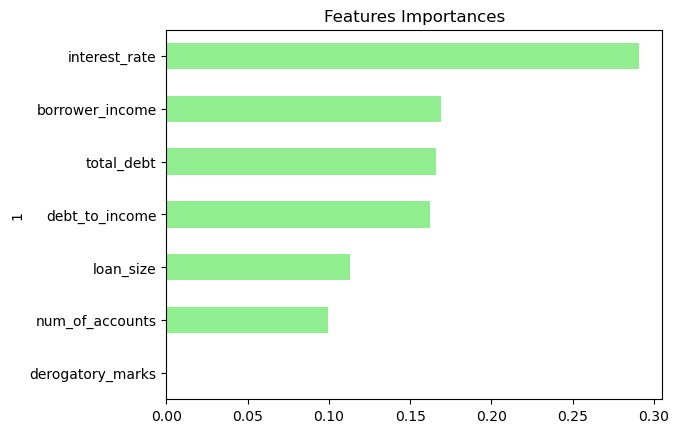

In [66]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)